In [1]:
import numpy as np
import os
np.set_printoptions(threshold=np.inf, precision=4)
import matplotlib.pyplot as plt
import cv2

from skimage.transform import resize, pyramid_reduce
import sys
import time

# import from the eggnog_preprocessing repo
sys.path.append('../../eggnog_preprocessing/preprocessing/')
import read_videos_write_img_paf_hm as prep

from skimage import io

import av
import PIL

paf_pairs_indices = [[1, 14], [0, 1], [12, 0], [13, 0], 
                    [4, 14], [5, 4], [6, 5], [7, 6], [15, 7], [16, 6],
                    [8, 14], [9, 8], [10, 9], [11, 10], [17, 11], [18, 10],
                    [14, 2], [2, 3]
                    ]

In [2]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         if image.ndim == 2:
#             plt.gray()
#         plt.imshow(images[-1])
        plt.imshow(image, cmap=plt.get_cmap('gray'), alpha=1.0)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
#     print('np.array(fig.get_size_inches()) * n_images', np.array(fig.get_size_inches()) * n_images)
#     fig.set_size_inches([246, 164])
    plt.show()
    

In [12]:
# ## list directory of output transformed images
# transformed_dir = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/transformed/r2/"
# tarball 
# tx_imgs = [im for im in sorted(os.listdir(transformed_dir)) if im.endswith('.jpg')]
# # print("tx_imgs len and [0]", len(tx_imgs), tx_imgs[0])

# image_idx = 53


# # original image 240x320
# # test_image_file_path = os.path.join(gt_raw_data_path, gt_file_pre + '_240x320.jpg')
# test_image_file_path = os.path.join(transformed_dir, tx_imgs[image_idx])
# # "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s07_1video_transformed_train/part1_layout_p14/20151116_230338_00_Video/20151116_230338_00_Video_vfr_90_skfr_90_240x320_transformed.jpg"
# print("test_image_file_path", test_image_file_path)

# original_image = cv2.imread(test_image_file_path)  # B,G,R order
# rgb_image = original_image[:,:,[2,1,0]]
# down_image = pyramid_reduce(rgb_image, downscale=8)

# print("original transformed rgb image =")
# plt.figure(0)
# plt.imshow(rgb_image)  
# plt.show()

# ### search the video for this image
# video_name = tx_imgs[image_idx].split('_vfr')[0]
# name_part2 = tx_imgs[image_idx].split('_vfr')[1].split('_')
# vfr = int(name_part2[1])
# skfr = int(name_part2[3])
# print("video_name, vfr, skfr =", video_name, vfr, skfr)


# print("=============================================")
# # search video_name in folder /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm
# dataset_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/"
# video_folder = "s04/part2_layout_p07/"  # "s04/part1_layout_p08/"
# video_path = os.path.join(dataset_path, video_folder, video_name + ".avi")

# video_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_v1/s04/part2_layout_p07/20151113_230303_00_Video.mp4"
# video_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video.avi"
video_path = '/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s18/part2_layouts_p35/20160129_195344_00_Video.avi'
print("video_file_path", video_path)
vfr = 50
print("vfr", vfr)

#1 original full image and original sk kp
xyz_skeleton_data, rgb_skeleton_data = prep.load_skeleton_data_for_video(video_path)
frame_dict = prep.load_frames_file(video_path)
vfr_time = frame_dict[vfr]
print("vfr_time", vfr_time)
print("len frame_dict", len(frame_dict.keys()))

print("rgb_skeleton_data", rgb_skeleton_data.shape, rgb_skeleton_data[..., 0].shape)
nearest_idx, nearest_time = prep.find_nearest_frameindex_from_skeleton_file(rgb_skeleton_data[...,0], frame_dict[vfr])
print("nearest_idx, nearest_time", nearest_idx, nearest_time)
# print("", rgb_skeleton_data[nearest_idx+1], rgb_skeleton_data[nearest_idx-1])

print("rgb nearest", nearest_time, nearest_idx, rgb_skeleton_data[nearest_idx])
rgb_kp = rgb_skeleton_data[nearest_idx][1:].reshape((19,3))
print("rgb kp\n", rgb_kp)

rgb_kp = rgb_kp[:,1:]
print("rgb kp\n", rgb_kp)

# cap = cv2.VideoCapture(video_path)
# assert(cap.isOpened() == True)

# cap.set(cv2.CAP_PROP_POS_FRAMES, vfr)
# success, frame = cap.read()  # frame is read as (h, w, c)
# if success:
#     print("frame.shape", frame.shape)
#     img_full = frame[...,::-1]
#     img_central = img_full[:, 240:(1920-240), :]
#     print("original full rgb image =")
#     plt.figure()
#     plt.imshow(img_full)  
#     plt.show()
    
    

video_file_path /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s18/part2_layouts_p35/20160129_195344_00_Video.avi
vfr 50
xyz_skeleton_data.shape (795, 58)
rgb_skeleton_data.shape (795, 58)
total frames in the video = 811
vfr_time 19666666.0
len frame_dict 811
rgb_skeleton_data (795, 58) (795,)
nearest_idx, nearest_time 49 19483565.0
rgb nearest 19483565.0 49 [1.9484e+07 2.0000e+00 1.0421e+03 6.2101e+02 2.0000e+00 1.0602e+03
 4.5868e+02 2.0000e+00 1.0801e+03 2.8684e+02 2.0000e+00 1.1166e+03
 1.8168e+02 2.0000e+00 9.8112e+02 3.4542e+02 2.0000e+00 9.2539e+02
 4.6764e+02 2.0000e+00 9.7278e+02 5.3899e+02 2.0000e+00 1.0057e+03
 5.5851e+02 2.0000e+00 1.1805e+03 3.7373e+02 2.0000e+00 1.1865e+03
 5.0262e+02 2.0000e+00 1.1763e+03 6.1923e+02 2.0000e+00 1.1608e+03
 6.5512e+02 2.0000e+00 9.9402e+02 6.1463e+02 2.0000e+00 1.0914e+03
 6.2738e+02 2.0000e+00 1.0749e+03 3.3075e+02 2.0000e+00 1.0261e+03
 5.6576e+02 2.0000e+00 1.0388e+03 5.6592e+02 2.0000e+00 1.1433e+03
 6.8940e+02 2.0000e+00 1.1823e+03 6.70

reading video /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s18/part2_layouts_p35/20160129_195344_00_Video.avi
frame number (vfr) and rgb skeleton frame number 0 0
original full rgb image =


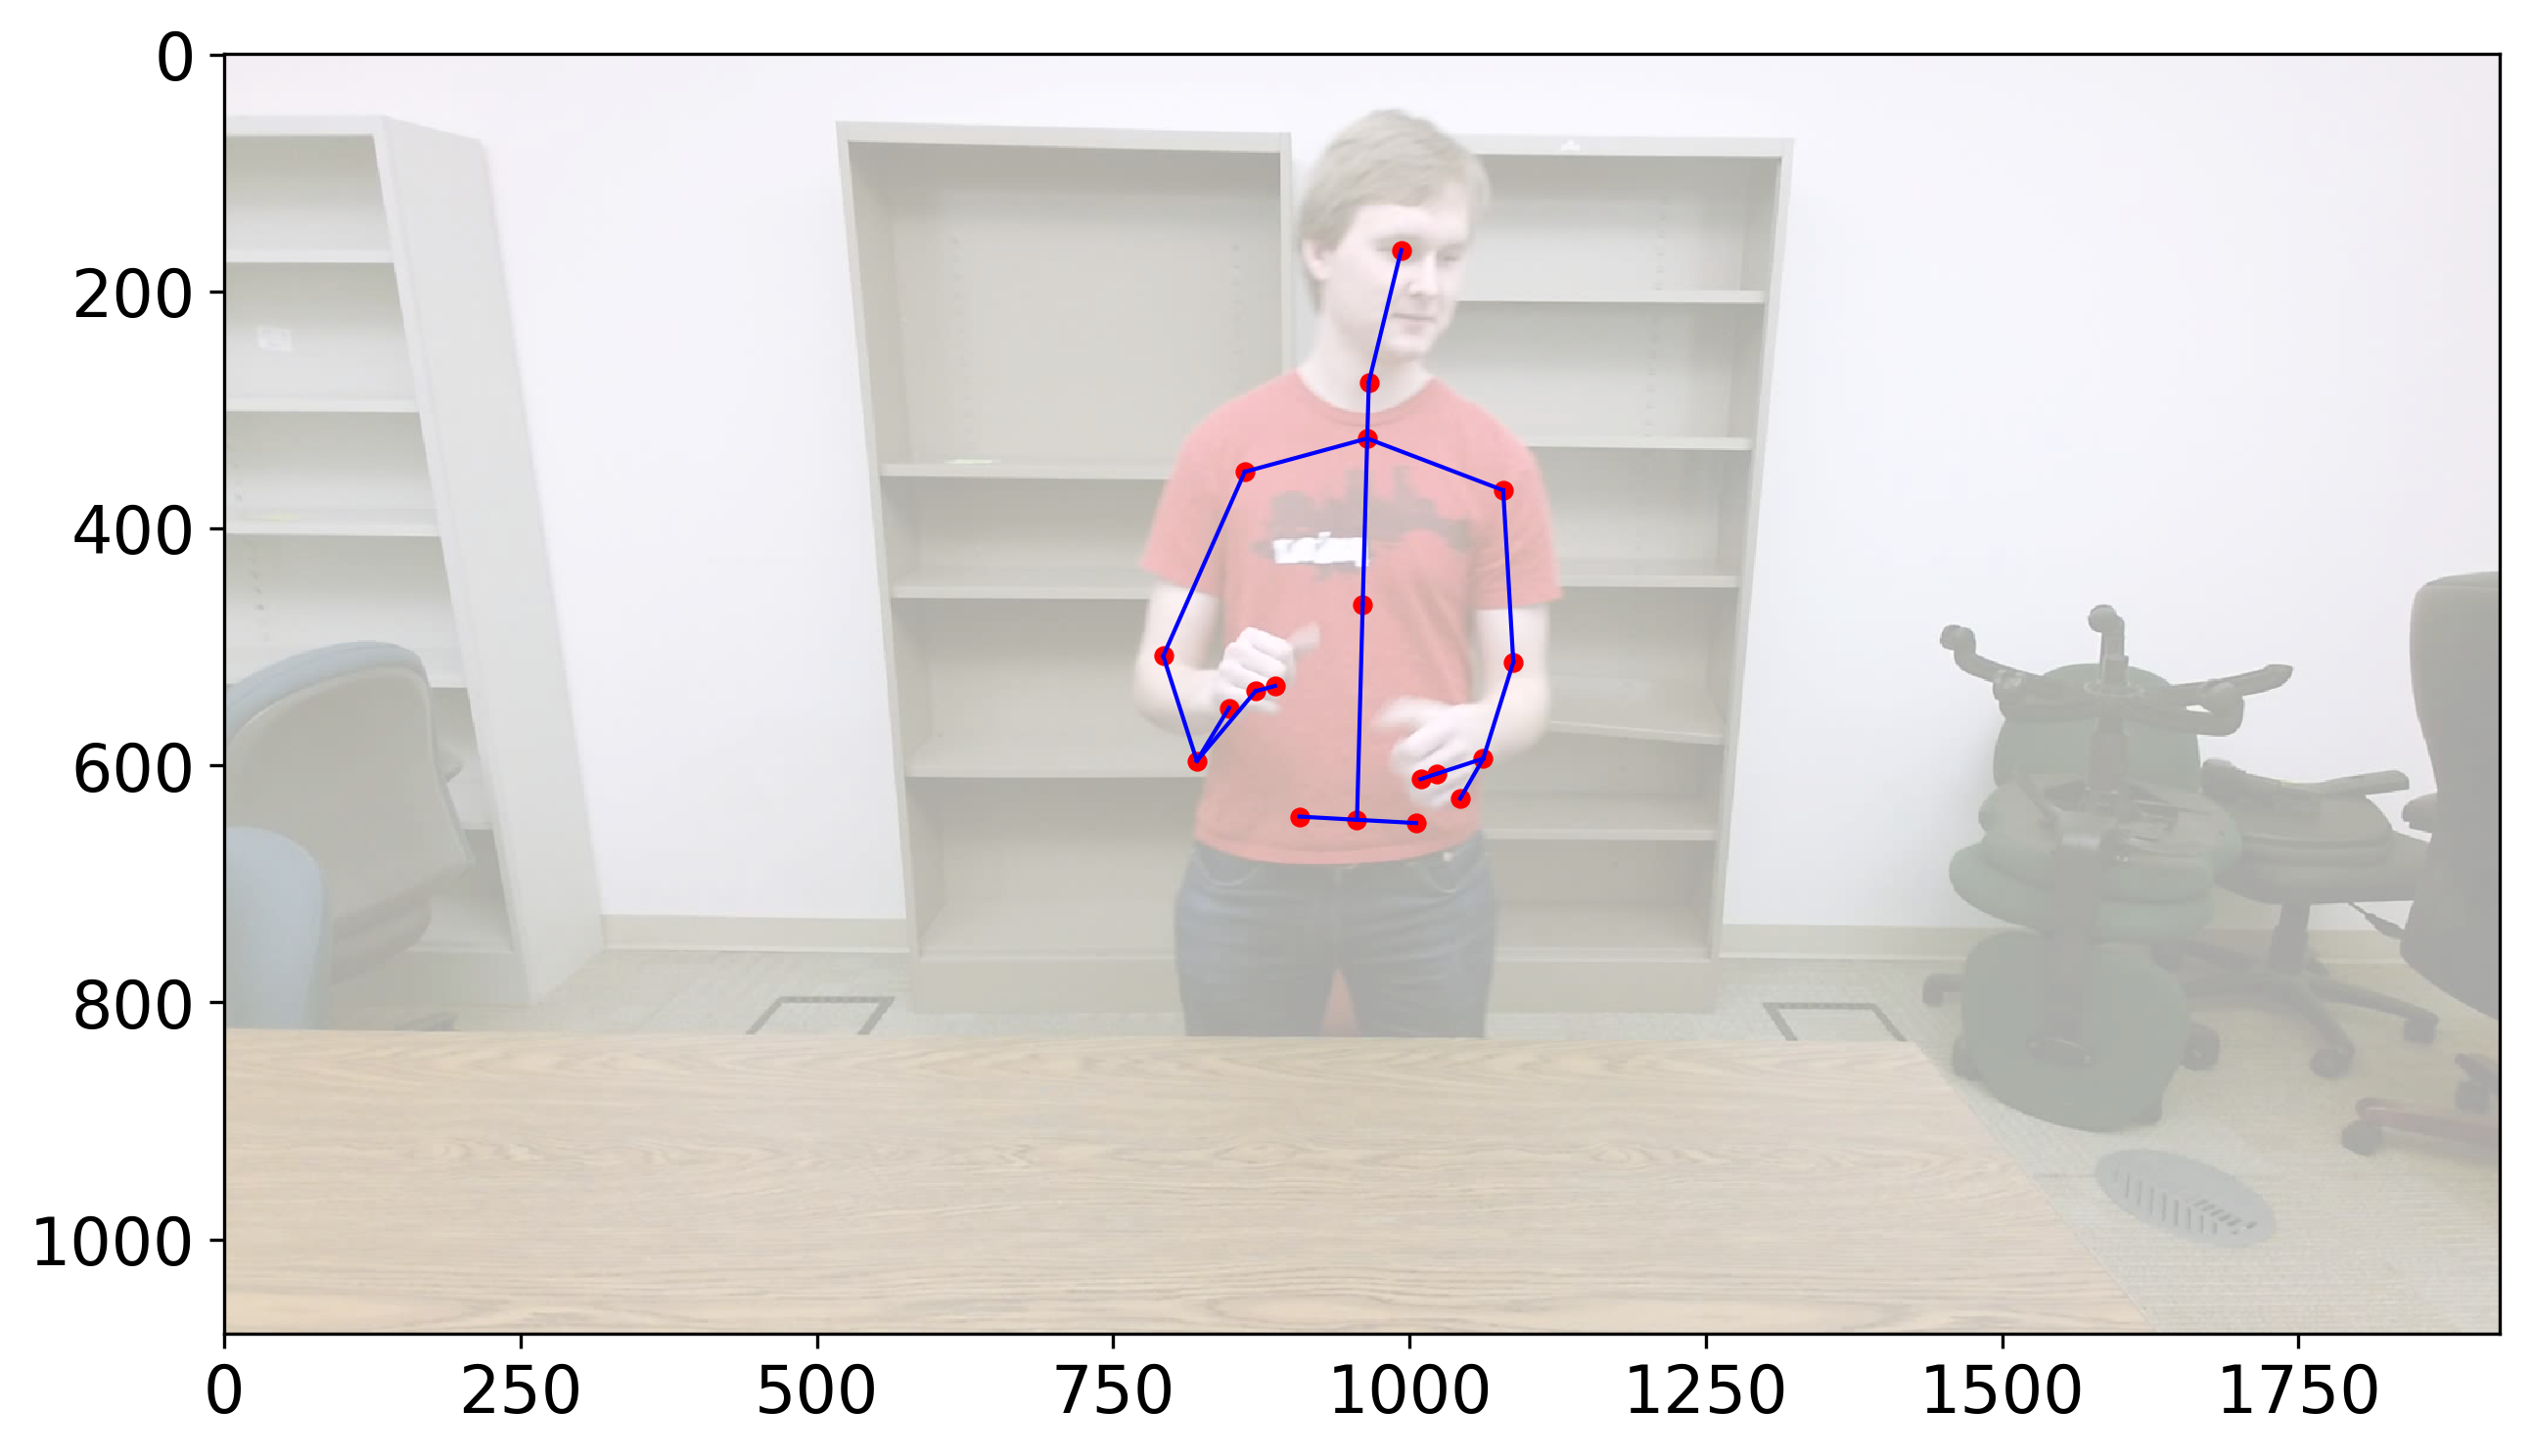

frame number (vfr) and rgb skeleton frame number 1 0
frame number (vfr) and rgb skeleton frame number 2 2
frame number (vfr) and rgb skeleton frame number 3 2
frame number (vfr) and rgb skeleton frame number 4 3
frame number (vfr) and rgb skeleton frame number 5 4
frame number (vfr) and rgb skeleton frame number 6 6
frame number (vfr) and rgb skeleton frame number 7 7
frame number (vfr) and rgb skeleton frame number 8 8
frame number (vfr) and rgb skeleton frame number 9 9
frame number (vfr) and rgb skeleton frame number 10 10
frame number (vfr) and rgb skeleton frame number 11 11
frame number (vfr) and rgb skeleton frame number 12 11
frame number (vfr) and rgb skeleton frame number 13 13
frame number (vfr) and rgb skeleton frame number 14 14
frame number (vfr) and rgb skeleton frame number 15 15
frame number (vfr) and rgb skeleton frame number 16 15
frame number (vfr) and rgb skeleton frame number 17 16
frame number (vfr) and rgb skeleton frame number 18 17
frame number (vfr) and rgb s

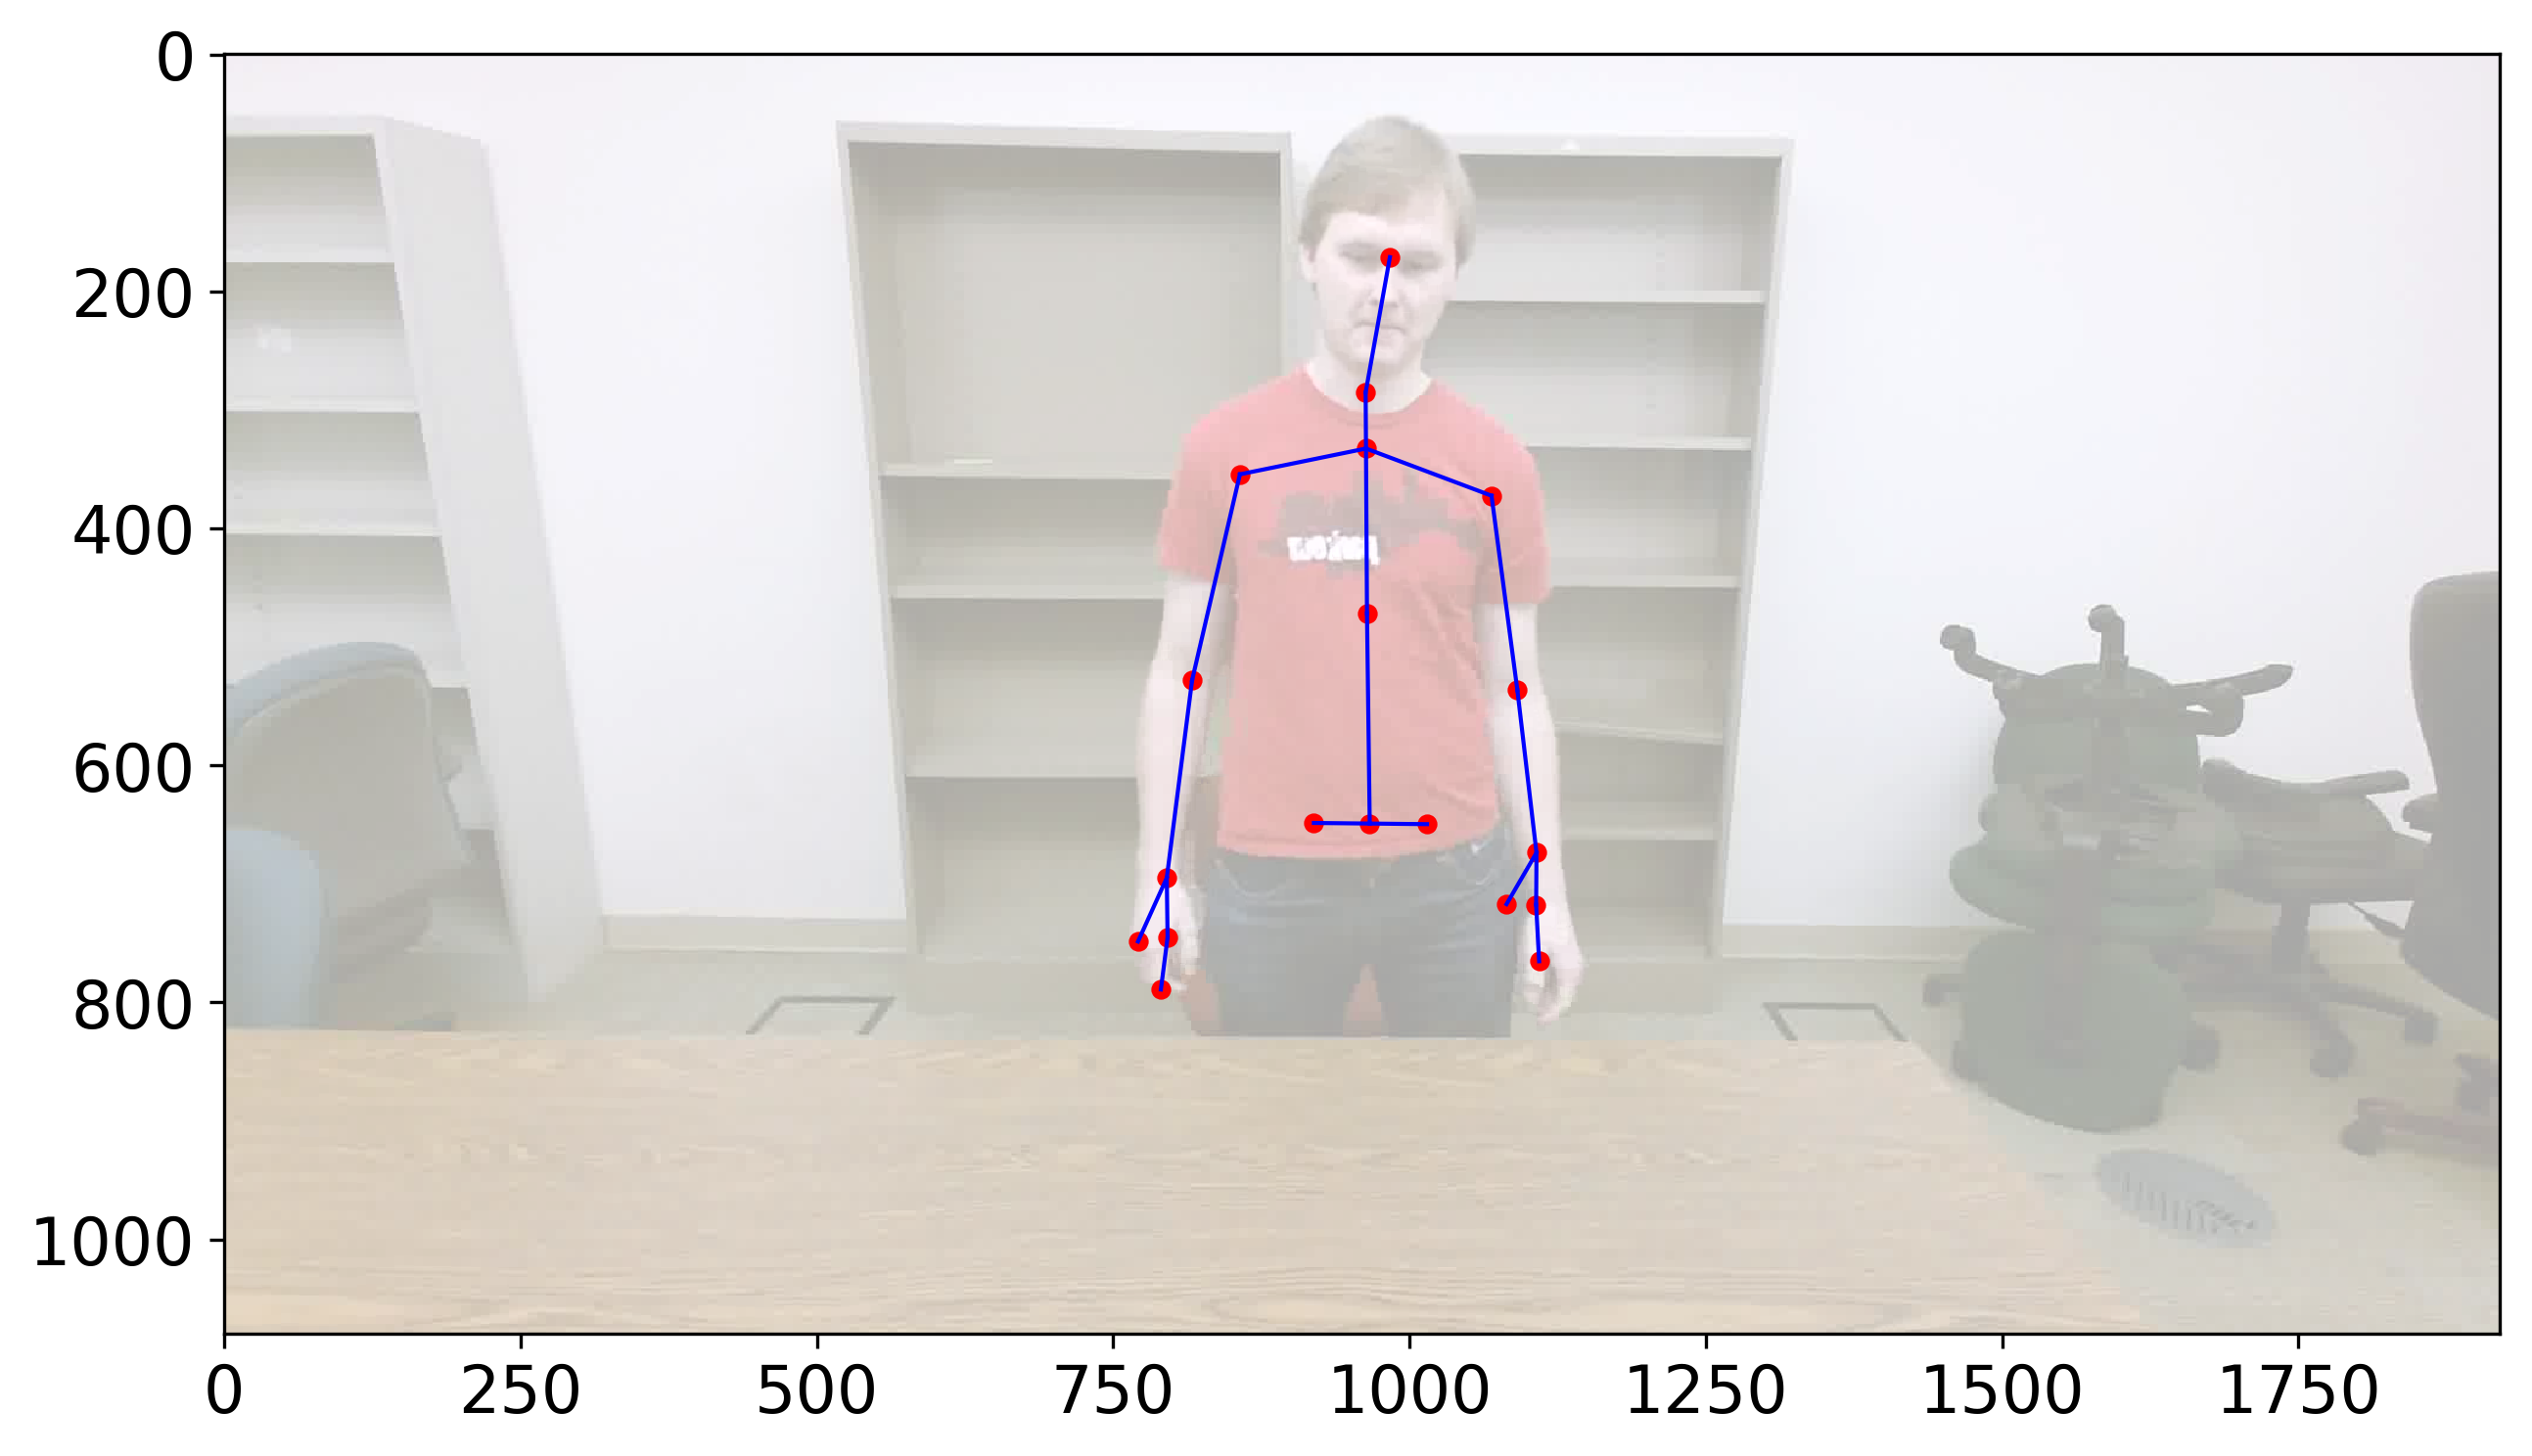

frame number (vfr) and rgb skeleton frame number 153 150
frame number (vfr) and rgb skeleton frame number 154 151
frame number (vfr) and rgb skeleton frame number 155 153
frame number (vfr) and rgb skeleton frame number 156 154
frame number (vfr) and rgb skeleton frame number 157 155
frame number (vfr) and rgb skeleton frame number 158 156
frame number (vfr) and rgb skeleton frame number 159 157
frame number (vfr) and rgb skeleton frame number 160 158
frame number (vfr) and rgb skeleton frame number 161 159
frame number (vfr) and rgb skeleton frame number 162 160
frame number (vfr) and rgb skeleton frame number 163 161
frame number (vfr) and rgb skeleton frame number 164 161
frame number (vfr) and rgb skeleton frame number 165 162
frame number (vfr) and rgb skeleton frame number 166 164
frame number (vfr) and rgb skeleton frame number 167 165
frame number (vfr) and rgb skeleton frame number 168 166
frame number (vfr) and rgb skeleton frame number 169 167
frame number (vfr) and rgb skel

original full rgb image =


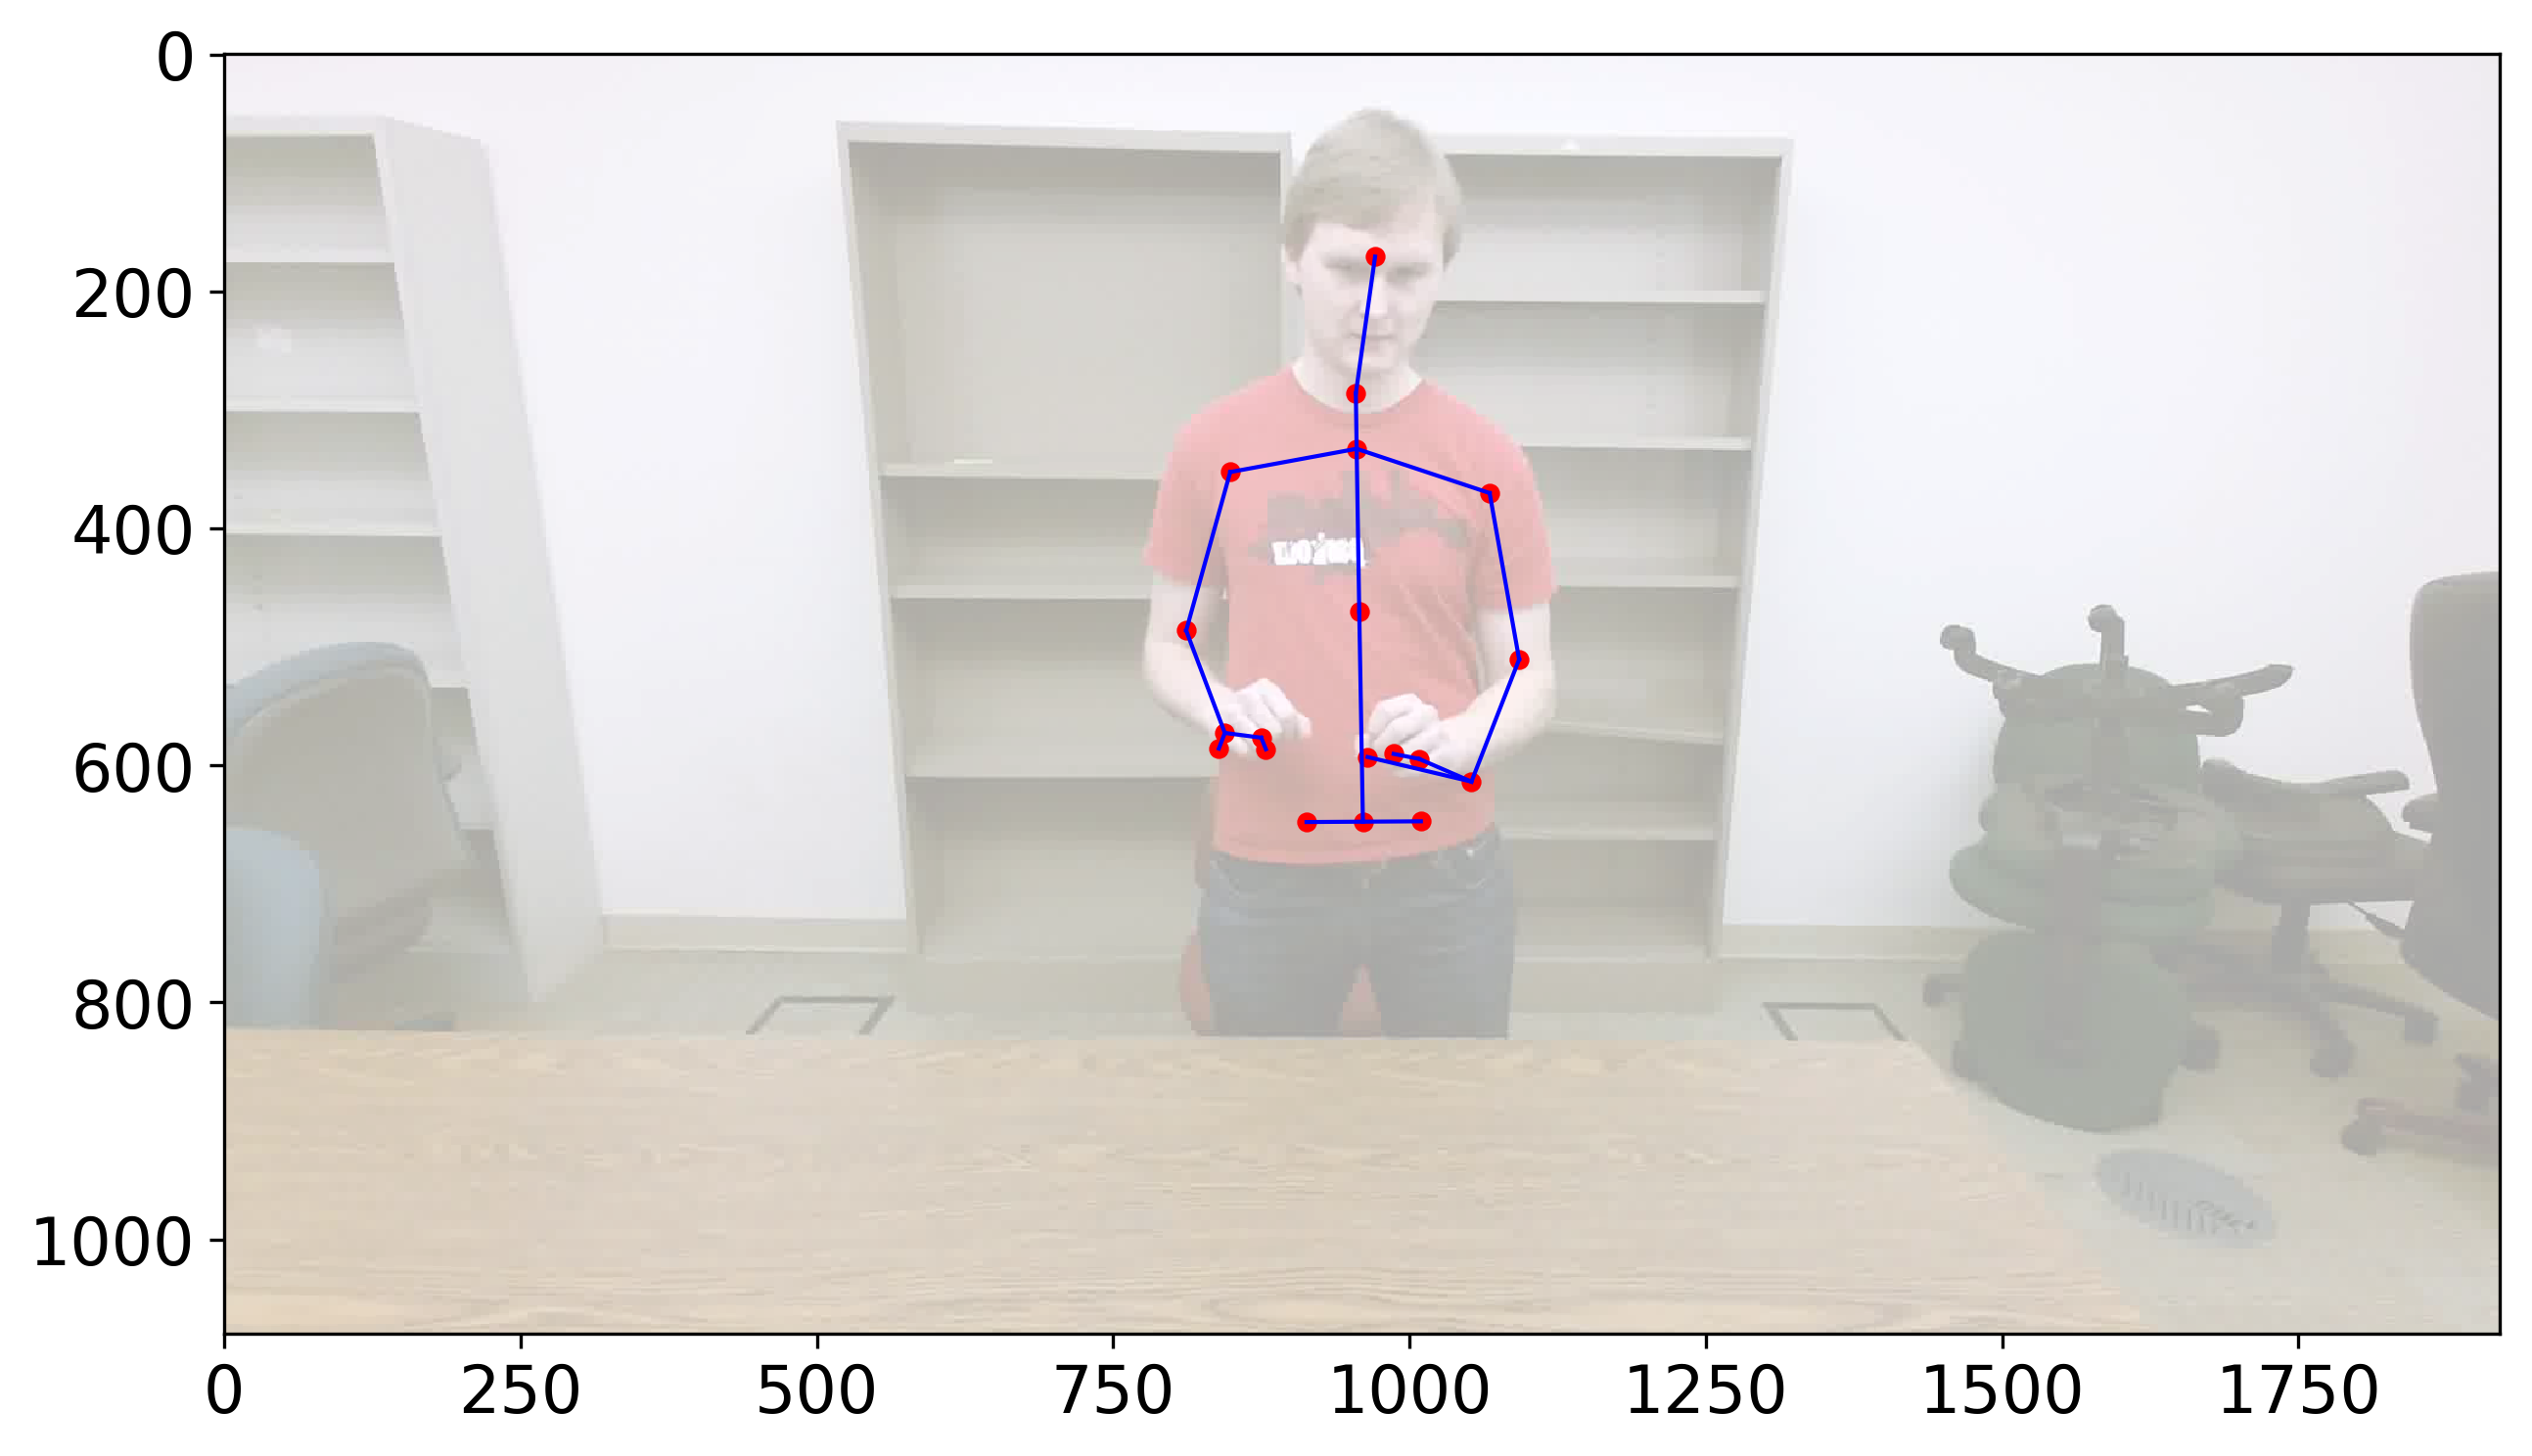

frame number (vfr) and rgb skeleton frame number 305 300
frame number (vfr) and rgb skeleton frame number 306 301
frame number (vfr) and rgb skeleton frame number 307 301
frame number (vfr) and rgb skeleton frame number 308 302
frame number (vfr) and rgb skeleton frame number 309 303
frame number (vfr) and rgb skeleton frame number 310 305
frame number (vfr) and rgb skeleton frame number 311 306
frame number (vfr) and rgb skeleton frame number 312 307
frame number (vfr) and rgb skeleton frame number 313 308
frame number (vfr) and rgb skeleton frame number 314 309
frame number (vfr) and rgb skeleton frame number 315 310
frame number (vfr) and rgb skeleton frame number 316 310
frame number (vfr) and rgb skeleton frame number 317 312
frame number (vfr) and rgb skeleton frame number 318 313
frame number (vfr) and rgb skeleton frame number 319 314
frame number (vfr) and rgb skeleton frame number 320 314
frame number (vfr) and rgb skeleton frame number 321 315
frame number (vfr) and rgb skel

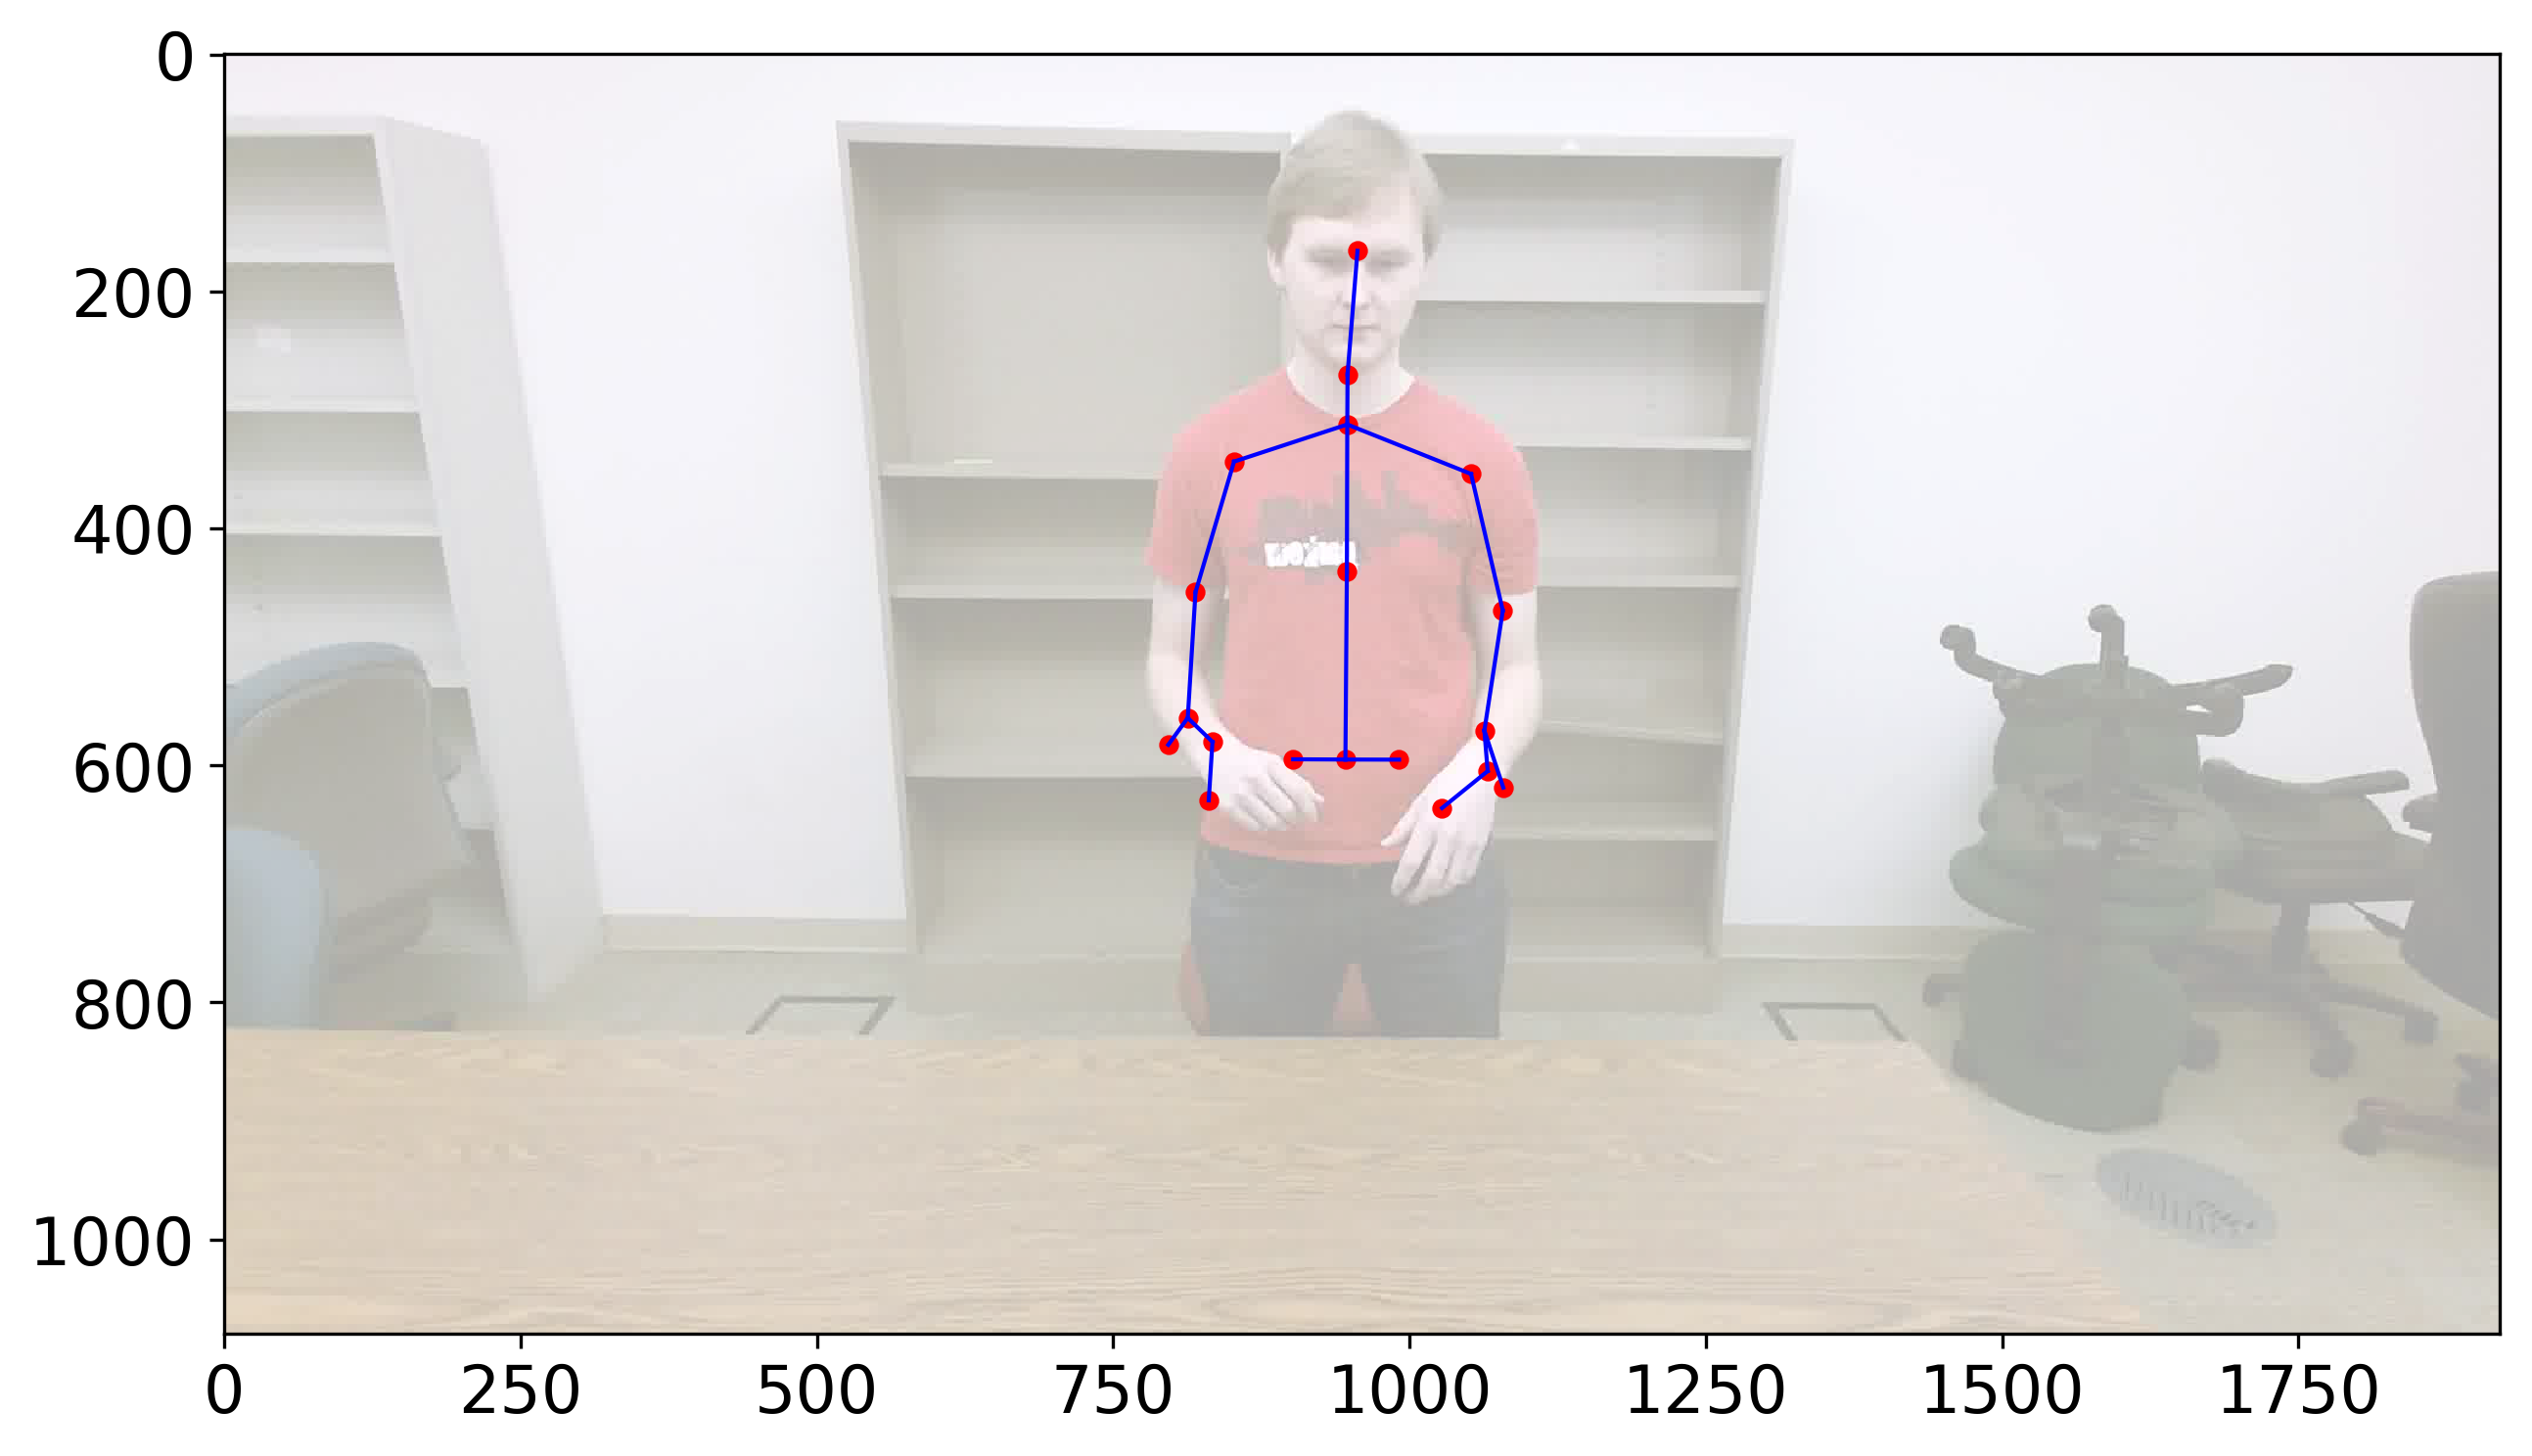

frame number (vfr) and rgb skeleton frame number 457 448
frame number (vfr) and rgb skeleton frame number 458 449
frame number (vfr) and rgb skeleton frame number 459 449
frame number (vfr) and rgb skeleton frame number 460 450
frame number (vfr) and rgb skeleton frame number 461 452
frame number (vfr) and rgb skeleton frame number 462 453
frame number (vfr) and rgb skeleton frame number 463 454
frame number (vfr) and rgb skeleton frame number 464 455
frame number (vfr) and rgb skeleton frame number 465 456
frame number (vfr) and rgb skeleton frame number 466 457
frame number (vfr) and rgb skeleton frame number 467 457
frame number (vfr) and rgb skeleton frame number 468 458
frame number (vfr) and rgb skeleton frame number 469 459
frame number (vfr) and rgb skeleton frame number 470 460
frame number (vfr) and rgb skeleton frame number 471 461
frame number (vfr) and rgb skeleton frame number 472 462
frame number (vfr) and rgb skeleton frame number 473 463
frame number (vfr) and rgb skel

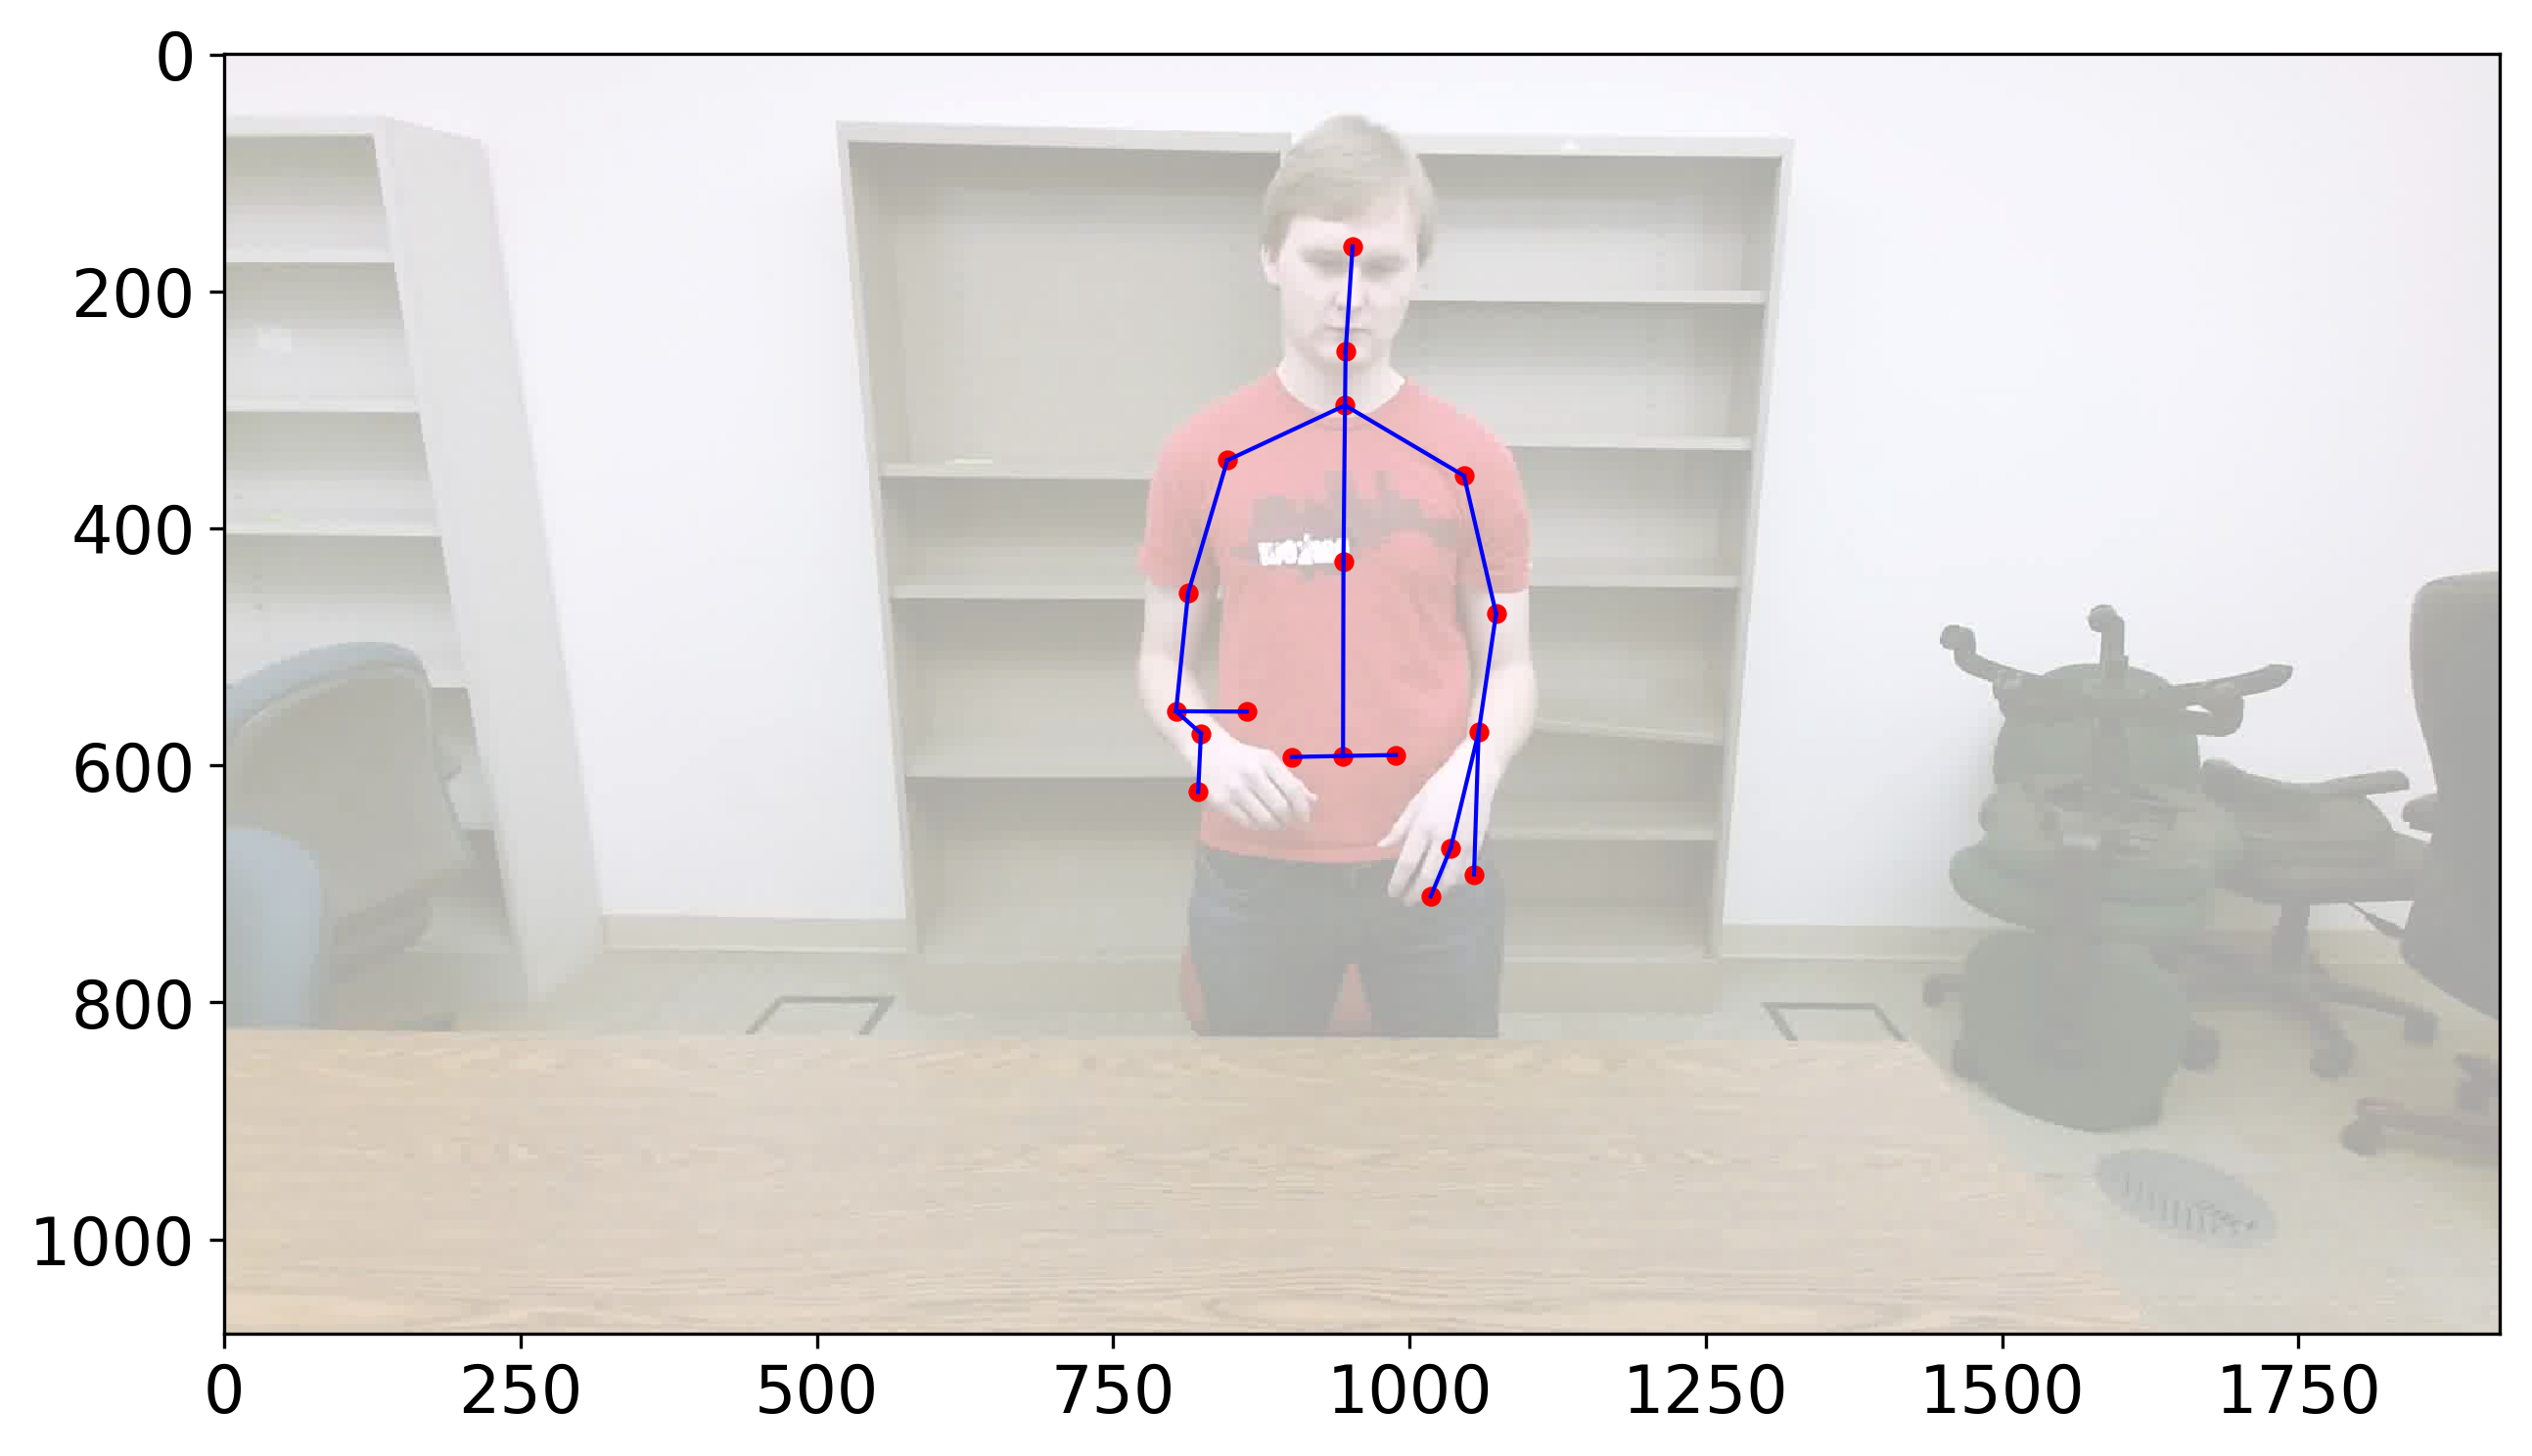

frame number (vfr) and rgb skeleton frame number 609 597
frame number (vfr) and rgb skeleton frame number 610 599
frame number (vfr) and rgb skeleton frame number 611 600
frame number (vfr) and rgb skeleton frame number 612 601
frame number (vfr) and rgb skeleton frame number 613 602
frame number (vfr) and rgb skeleton frame number 614 603
frame number (vfr) and rgb skeleton frame number 615 603
frame number (vfr) and rgb skeleton frame number 616 604
frame number (vfr) and rgb skeleton frame number 617 605
frame number (vfr) and rgb skeleton frame number 618 606
frame number (vfr) and rgb skeleton frame number 619 607
frame number (vfr) and rgb skeleton frame number 620 608
frame number (vfr) and rgb skeleton frame number 621 609
frame number (vfr) and rgb skeleton frame number 622 610
frame number (vfr) and rgb skeleton frame number 623 610
frame number (vfr) and rgb skeleton frame number 624 611
frame number (vfr) and rgb skeleton frame number 625 612
frame number (vfr) and rgb skel

frame number (vfr) and rgb skeleton frame number 760 745
original full rgb image =


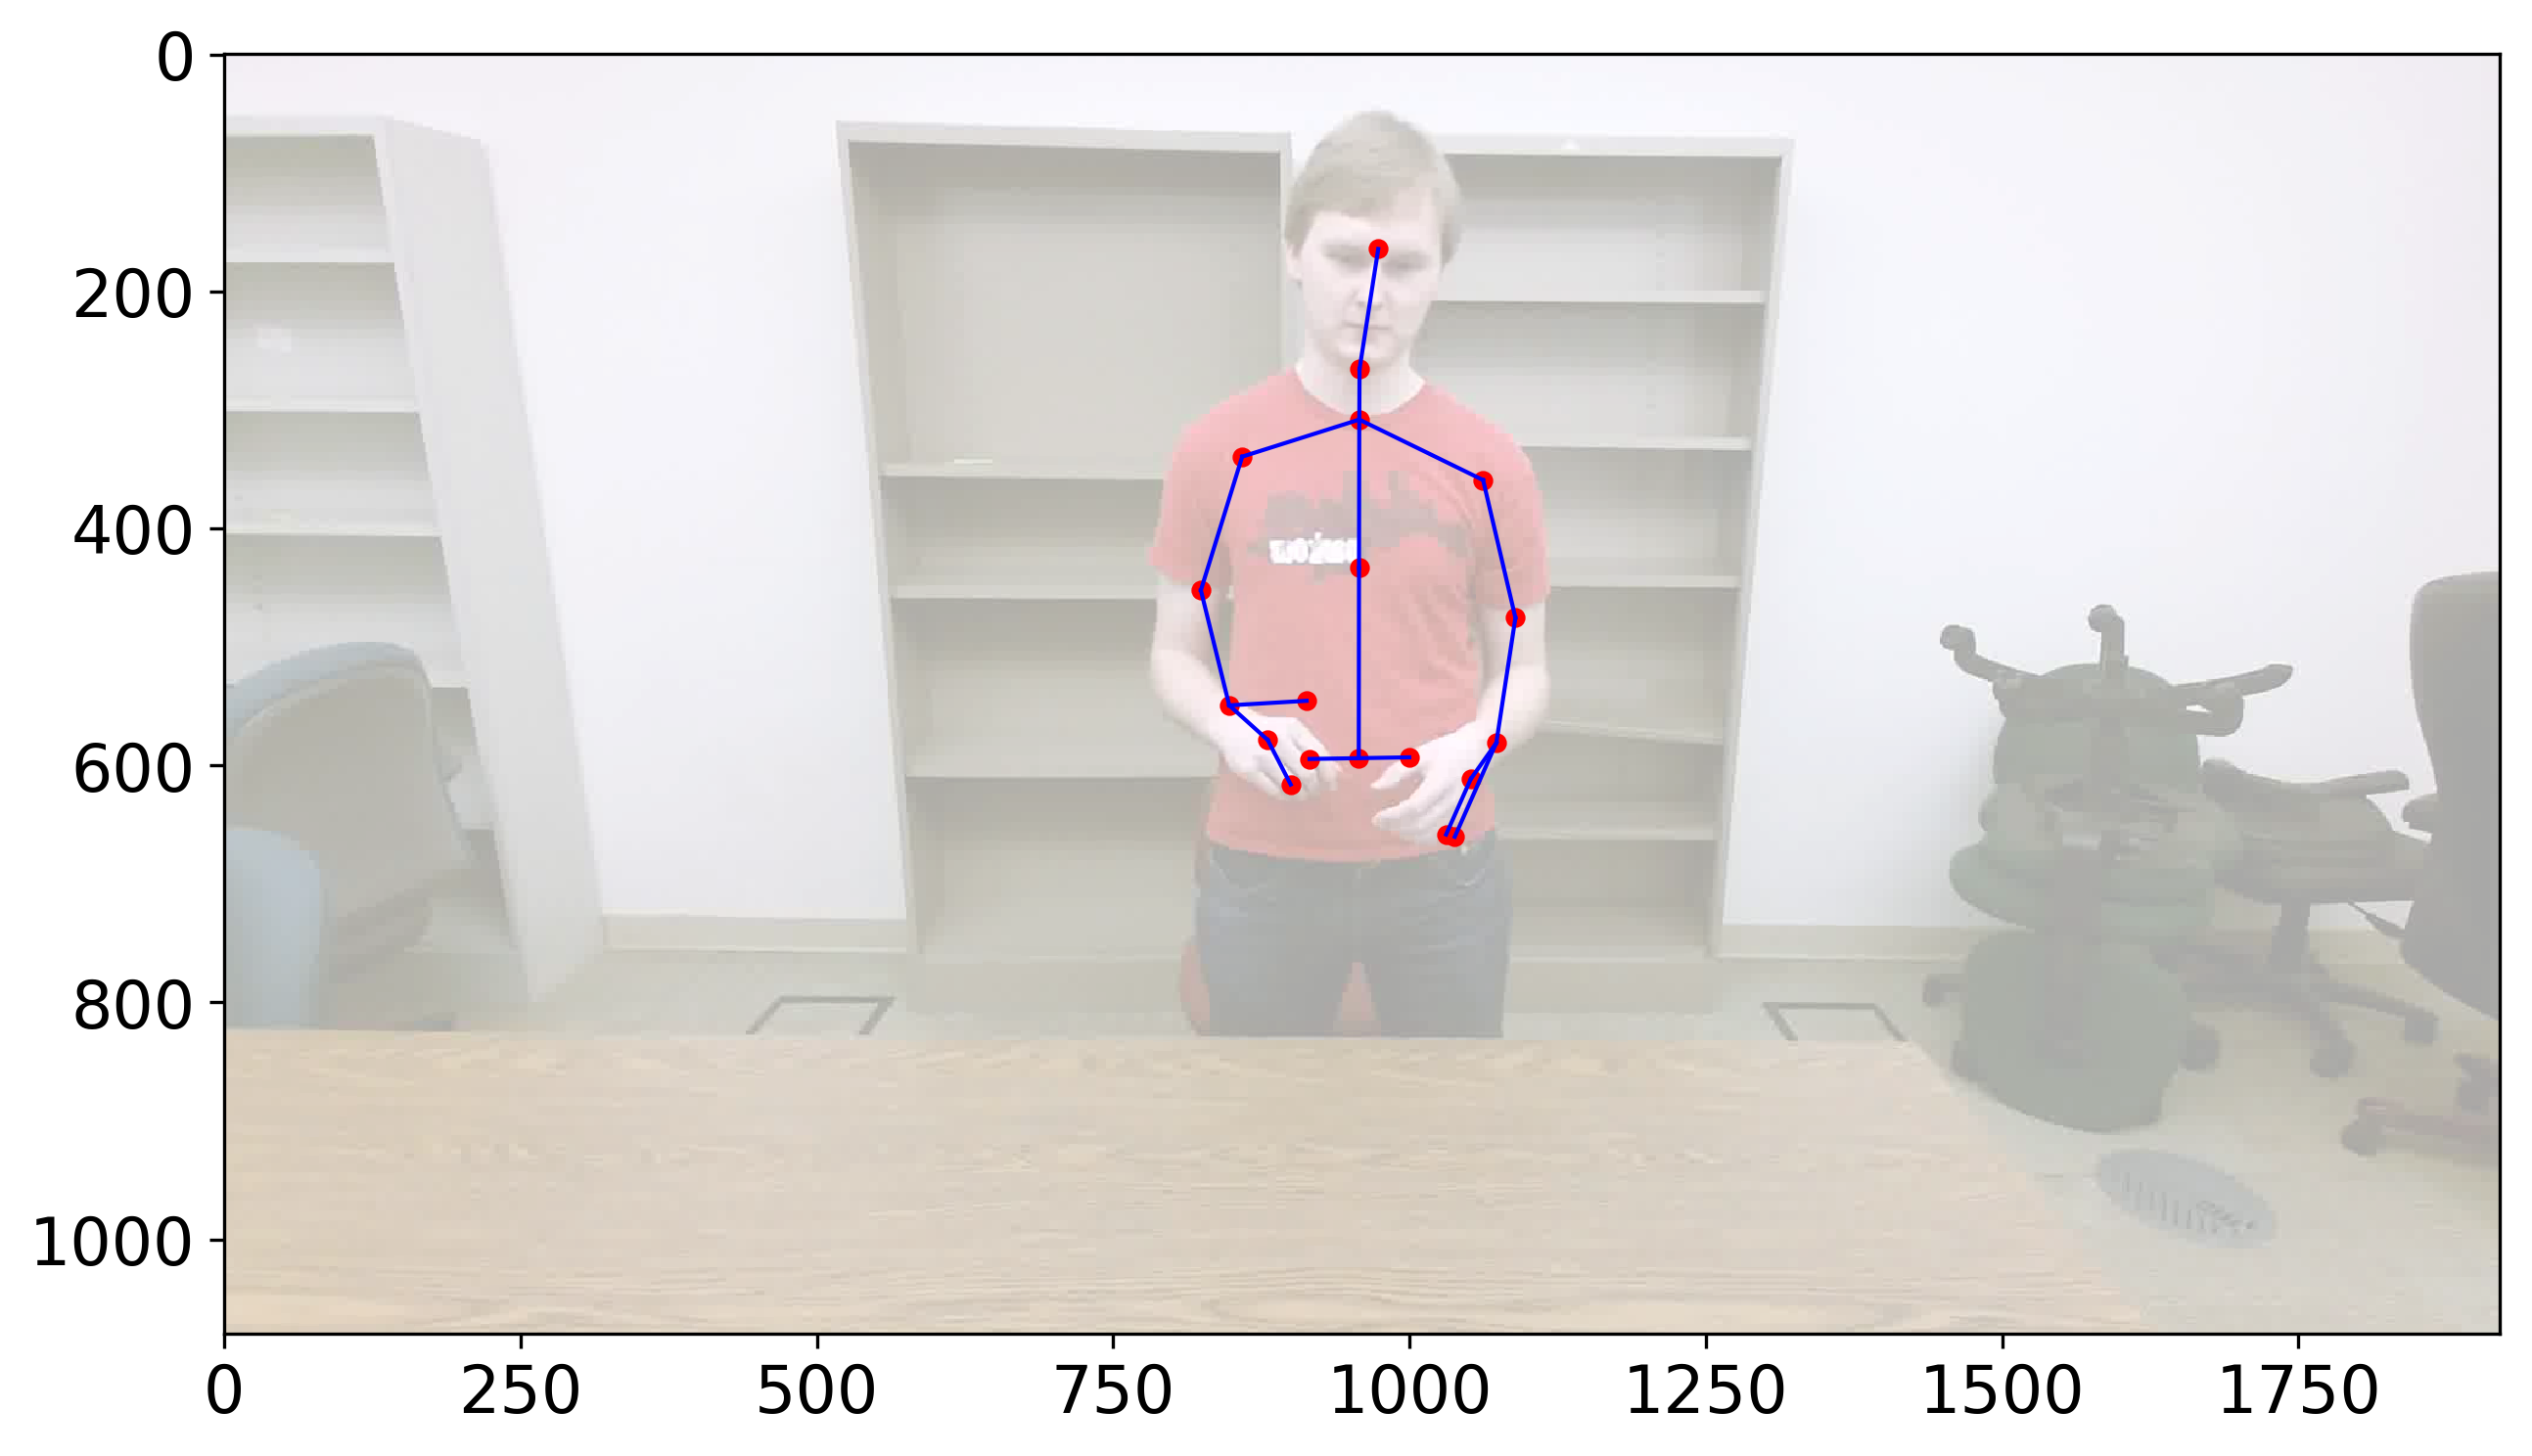

frame number (vfr) and rgb skeleton frame number 761 746
frame number (vfr) and rgb skeleton frame number 762 747
frame number (vfr) and rgb skeleton frame number 763 748
frame number (vfr) and rgb skeleton frame number 764 749
frame number (vfr) and rgb skeleton frame number 765 750
frame number (vfr) and rgb skeleton frame number 766 751
frame number (vfr) and rgb skeleton frame number 767 752
frame number (vfr) and rgb skeleton frame number 768 753
frame number (vfr) and rgb skeleton frame number 769 753
frame number (vfr) and rgb skeleton frame number 770 755
frame number (vfr) and rgb skeleton frame number 771 756
frame number (vfr) and rgb skeleton frame number 772 757
frame number (vfr) and rgb skeleton frame number 773 758
frame number (vfr) and rgb skeleton frame number 774 758
frame number (vfr) and rgb skeleton frame number 775 759
frame number (vfr) and rgb skeleton frame number 776 760
frame number (vfr) and rgb skeleton frame number 777 762
frame number (vfr) and rgb skel

In [16]:
### video visualization with pyav
print("reading video", video_path)

MEDIUM_SIZE = 16
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels

container = av.open(video_path)

for k, frame in enumerate(container.decode(video=0)):
    nearest_idx, nearest_time = prep.find_nearest_frameindex_from_skeleton_file(rgb_skeleton_data[...,0], frame_dict[k]) #
    print("frame number (vfr) and rgb skeleton frame number", k, nearest_idx)
    time.sleep(0.0)
    
    img_pil = frame.to_image()
    img_arr = np.asarray(img_pil)
    
    if (abs(frame_dict[k] - nearest_time) > 1000000):  # 100 ns ticks, so 1000000 = 0.1sec
        mismatch_count += 1
        print("THIS is a mismatch in time, of more than 0.1 sec")
        continue  # do not add the nearest found index if the difference is really big (>0.1sec)
    else:         
        # print(rgb_skeleton_data[nearest_idx])
        if(np.inf not in rgb_skeleton_data[nearest_idx]):  # do not add if there is np.inf in the line
            rgb_kp = rgb_skeleton_data[nearest_idx][1:].reshape((19,3))[:,1:]
            
            if k%152==0:
                img_full = img_arr
                print("original full rgb image =")
                plt.figure(num=None, figsize=(10, 10), dpi=300, facecolor='w', edgecolor='k')
                plt.imshow(img_full, alpha=0.35)
                plt.scatter(x=rgb_kp[...,0], y=rgb_kp[...,1], c='r', s=15)
                for p in paf_pairs_indices:
#                   print(p)
                    plt.plot([rgb_kp[p[0]][0], rgb_kp[p[1]][0]], [rgb_kp[p[0]][1], rgb_kp[p[1]][1]], 'b-', lw=1)
                plt.show()
                    

In [ ]:
### video visualization with opencv
print("reading video", video_path)

cap = cv2.VideoCapture(video_path)
assert(cap.isOpened() == True)
for k in frame_dict.keys():
    nearest_idx, nearest_time = prep.find_nearest_frameindex_from_skeleton_file(rgb_skeleton_data[...,0], frame_dict[k]) #
    print("frame number (vfr) and rgb skeleton frame number", k, nearest_idx)
    time.sleep(0.0)
    # input("press anything to continue")
    if (abs(frame_dict[k] - nearest_time) > 1000000):  # 100 ns ticks, so 1000000 = 0.1sec
        mismatch_count += 1
        print("THIS is a mismatch in time, of more than 0.1 sec")
        continue  # do not add the nearest found index if the difference is really big (>0.1sec)
    else:         
        # print(rgb_skeleton_data[nearest_idx])
        if(np.inf not in rgb_skeleton_data[nearest_idx]):  # do not add if there is np.inf in the line
            rgb_kp = rgb_skeleton_data[nearest_idx][1:].reshape((19,3))[:,1:]
            cap.set(cv2.CAP_PROP_POS_FRAMES, k)
            success, frame = cap.read()  # frame is read as (h, w, c)
            if success and k%30==0:
                img_full = frame[...,::-1]
                print("original full rgb image =")
                plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
                plt.imshow(img_full, alpha=0.25)
                plt.scatter(x=rgb_kp[...,0], y=rgb_kp[...,1], c='r', s=10)
                for p in paf_pairs_indices:
#                   print(p)
                    plt.plot([rgb_kp[p[0]][0], rgb_kp[p[1]][0]], [rgb_kp[p[0]][1], rgb_kp[p[1]][1]], 'b-', lw=1)
                plt.show()
                    
                    

In [ ]:
### video visualization with pyav-genereted images
pyav_images_path = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s05/part1_layout_p10/20151114_014811_00_Video/"
video_name = pyav_images_path.split('/')[-2]
print("video_name", video_name)

for k in frame_dict.keys():
    nearest_idx, nearest_time = prep.find_nearest_frameindex_from_skeleton_file(rgb_skeleton_data[...,0], frame_dict[k]) #
    print("frame number (vfr) and rgb skeleton frame number", k, nearest_idx)
    time.sleep(0.0)
    # input("press anything to continue")
    if (abs(frame_dict[k] - nearest_time) > 1000000):  # 100 ns ticks, so 1000000 = 0.1sec
        mismatch_count += 1
        print("THIS is a mismatch in time, of more than 0.1 sec")
        continue  # do not add the nearest found index if the difference is really big (>0.1sec)
    else:         
        # print(rgb_skeleton_data[nearest_idx])
        if(np.inf not in rgb_skeleton_data[nearest_idx]):  # do not add if there is np.inf in the line
            rgb_kp = rgb_skeleton_data[nearest_idx][1:].reshape((19,3))[:,1:]
            
#             frame_path = pyav_images_path + video_name + "_vfr_" + str(k) + "_skfr_00000_1920x1080.jpg"
            frame_path = pyav_images_path + video_name + "_vfr_" + str(k) + "_skfr_" + str(nearest_idx) + "_240x320.jpg"
            frame = io.imread(frame_path)
            
            
            if k%30==0:
                img_full = frame[...,::-1]
                img_full = resize(img_full, (1080, 1920))
                print("original full rgb image =")
                plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
                plt.imshow(img_full, alpha=0.25)
                plt.scatter(x=rgb_kp[...,0], y=rgb_kp[...,1], c='r', s=10)
                for p in paf_pairs_indices:
#                   print(p)
                    plt.plot([rgb_kp[p[0]][0], rgb_kp[p[1]][0]], [rgb_kp[p[0]][1], rgb_kp[p[1]][1]], 'b-', lw=1)
                plt.show()
                    
            
            
#### NEED TO COMPENSATE FOR left and right padding

In [20]:
k = 5500
cap = cv2.VideoCapture(video_path)
assert(cap.isOpened() == True)
print("k", k)
print("dict", len(frame_dict.keys()))
cap.set(cv2.CAP_PROP_POS_FRAMES, k)
success, frame = cap.read()
if success:
    print("frame.shape", frame.shape)
    img_full = frame[...,::-1]
    print("original full rgb image =")
    plt.figure()
    plt.imshow(img_full)  
    plt.show()
    
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("n_frames according to opencv", length)

"""
n_frames according to opencv 5548

mplayer gives the same number as opencv
/usr/local/mplayer/bin/mplayer /s/red/a/nobackup/cwc/data/userstudies/initial_study_xef/s04/part2_layout_p07/20151113_230303_00_Video.avi
A: 184.9 V: 184.9 A-V: -0.017 ct: -0.137 5548/5548 12%  0%  0.1% 0 0 
BUT
ffprobe gives:

rally-king:~/Desktop$ /s/parsons/h/proj/vision/usr/rahul/local/bin/ffprobe -v error -count_frames -select_streams v:0   -show_entries stream=nb_read_frames -of default=nokey=1:noprint_wrappers=1 /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s04/part2_layout_p07/20151113_230303_00_Video.avi 
4662

This number matches the number of lines in the .frames file.

"""

k 5500
dict 4662
n_frames according to opencv 4662


'\nn_frames according to opencv 5548\n\nmplayer gives the same number as opencv\n/usr/local/mplayer/bin/mplayer /s/red/a/nobackup/cwc/data/userstudies/initial_study_xef/s04/part2_layout_p07/20151113_230303_00_Video.avi\nA: 184.9 V: 184.9 A-V: -0.017 ct: -0.137 5548/5548 12%  0%  0.1% 0 0 \nBUT\nffprobe gives:\n\nrally-king:~/Desktop$ /s/parsons/h/proj/vision/usr/rahul/local/bin/ffprobe -v error -count_frames -select_streams v:0   -show_entries stream=nb_read_frames -of default=nokey=1:noprint_wrappers=1 /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s04/part2_layout_p07/20151113_230303_00_Video.avi \n4662\n\nThis number matches the number of lines in the .frames file.\n\n'